In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('credit_card_approval.csv')

In [3]:
df.head

<bound method NDFrame.head of       TARGET       ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY CNT_CHILDREN  \
0          0  5065438           F            Y               N  2+ children   
1          0  5142753           F            N               N  No children   
2          0  5111146           M            Y               Y  No children   
3          0  5010310           F            Y               Y   1 children   
4          0  5010835           M            Y               Y  2+ children   
...      ...      ...         ...          ...             ...          ...   
2005       1  5125716           F            Y               Y  No children   
2006       1  5079167           M            Y               N  No children   
2007       1  5085886           M            Y               Y  No children   
2008       1  5052661           F            N               Y  No children   
2009       1  5112858           F            Y               N   1 children   

      AMT_INCOME_TOTA

In [4]:
#df["TARGET"] = df["TARGET"].replace(0, "F")
#df["TARGET"] = df["TARGET"].replace(1, "T")

#print (df.TARGET)

In [5]:
print(df.dtypes)

TARGET                   int64
ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN            object
AMT_INCOME_TOTAL       float64
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
JOB                     object
BEGIN_MONTHS             int64
STATUS                  object
dtype: object


In [6]:
!pip install imbalanced-learn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler

     |████████████████████████████████| 199 kB 21.8 MB/s            
     |████████████████████████████████| 199 kB 67.0 MB/s            
     |████████████████████████████████| 189 kB 71.8 MB/s            


In [8]:
df['TARGET'].value_counts()

0    1048
1     962
Name: TARGET, dtype: int64

In [6]:
#target=df['TARGET']
#target.head

In [9]:
df.drop('ID', inplace=True, axis=1)
df.drop('BEGIN_MONTHS', inplace=True, axis=1)
        

In [10]:
pd.to_numeric(df.AMT_INCOME_TOTAL, downcast='signed')

0       270000.0
1        81000.0
2       270000.0
3       112500.0
4       139500.0
          ...   
2005    135000.0
2006    202500.0
2007    315000.0
2008    103500.0
2009    270000.0
Name: AMT_INCOME_TOTAL, Length: 2010, dtype: float64

In [11]:
df.CODE_GENDER=pd.Categorical(df.CODE_GENDER)

In [12]:
dict(enumerate(df['CODE_GENDER'].cat.categories))

{0: 'F', 1: 'M'}

In [13]:
df['NUM_CODE_GENDER'] = df.CODE_GENDER.cat.codes
df.drop('CODE_GENDER', inplace=True, axis=1)

In [14]:
df.FLAG_OWN_CAR=pd.Categorical(df.FLAG_OWN_CAR)
dict(enumerate(df['FLAG_OWN_CAR'].cat.categories))

{0: 'N', 1: 'Y'}

In [15]:

df['CODE_OWN_CAR'] = df.FLAG_OWN_CAR.cat.codes
df.drop('FLAG_OWN_CAR', inplace=True, axis=1)

In [16]:
df.FLAG_OWN_REALTY=pd.Categorical(df.FLAG_OWN_REALTY)
dict(enumerate(df['FLAG_OWN_REALTY'].cat.categories))

{0: 'N', 1: 'Y'}

In [17]:
df['CODE_OWN_REALTY'] = df.FLAG_OWN_REALTY.cat.codes
df.drop('FLAG_OWN_REALTY', inplace=True, axis=1)

In [18]:
df.CNT_CHILDREN=pd.Categorical(df.CNT_CHILDREN)
dict(enumerate(df['CNT_CHILDREN'].cat.categories))

{0: '1 children', 1: '2+ children', 2: 'No children'}

In [19]:
df['CODE_CNT_CHILDREN'] = df.CNT_CHILDREN.cat.codes
df.drop('CNT_CHILDREN', inplace=True, axis=1)

In [20]:
df.NAME_EDUCATION_TYPE=pd.Categorical(df.NAME_EDUCATION_TYPE)
dict(enumerate(df['NAME_EDUCATION_TYPE'].cat.categories))

{0: 'Academic degree',
 1: 'Higher education',
 2: 'Incomplete higher',
 3: 'Lower secondary',
 4: 'Secondary / secondary special'}

In [21]:
df['CODE_NAME_EDUCATION_TYPE'] = df.NAME_EDUCATION_TYPE.cat.codes
df.drop('NAME_EDUCATION_TYPE', inplace=True, axis=1)

In [22]:
df.NAME_FAMILY_STATUS=pd.Categorical(df.NAME_FAMILY_STATUS)
dict(enumerate(df['NAME_FAMILY_STATUS'].cat.categories))

{0: 'Civil marriage',
 1: 'Married',
 2: 'Separated',
 3: 'Single / not married',
 4: 'Widow'}

In [23]:
df['CODENAME_FAMILY_STATUS'] = df.NAME_FAMILY_STATUS.cat.codes
df.drop('NAME_FAMILY_STATUS', inplace=True, axis=1)

In [24]:
df.NAME_HOUSING_TYPE=pd.Categorical(df.NAME_HOUSING_TYPE)
dict(enumerate(df['NAME_HOUSING_TYPE'].cat.categories))

{0: 'Co-op apartment',
 1: 'House / apartment',
 2: 'Municipal apartment',
 3: 'Office apartment',
 4: 'Rented apartment',
 5: 'With parents'}

In [25]:
df['CODE_NAME_HOUSING_TYPE'] = df.NAME_HOUSING_TYPE.cat.codes
df.drop('NAME_HOUSING_TYPE', inplace=True, axis=1)

In [26]:
df.FLAG_MOBIL=pd.Categorical(df.FLAG_MOBIL)
dict(enumerate(df['FLAG_MOBIL'].cat.categories))

{0: 1}

In [27]:
df['CODE_FLAG_MOBIL'] = df.FLAG_MOBIL.cat.codes
df.drop('FLAG_MOBIL', inplace=True, axis=1)

In [28]:
df.FLAG_WORK_PHONE=pd.Categorical(df.FLAG_WORK_PHONE)
dict(enumerate(df['FLAG_WORK_PHONE'].cat.categories))

{0: 0, 1: 1}

In [29]:
df['CODE_WORK_PHONE'] = df.FLAG_WORK_PHONE.cat.codes
df.drop('FLAG_WORK_PHONE', inplace=True, axis=1)

In [30]:
df.FLAG_PHONE=pd.Categorical(df.FLAG_PHONE)
dict(enumerate(df['FLAG_PHONE'].cat.categories))

{0: 0, 1: 1}

In [31]:
df['CODE_FLAG_PHONE'] = df.FLAG_PHONE.cat.codes
df.drop('FLAG_PHONE', inplace=True, axis=1)

In [32]:
df.FLAG_EMAIL=pd.Categorical(df.FLAG_EMAIL)
dict(enumerate(df['FLAG_EMAIL'].cat.categories))

{0: 0, 1: 1}

In [33]:
df['CODE_EMAIL'] = df.FLAG_EMAIL.cat.codes
df.drop('FLAG_EMAIL', inplace=True, axis=1)

In [34]:
df.JOB=pd.Categorical(df.JOB)
dict(enumerate(df['JOB'].cat.categories))

{0: 'Accountants',
 1: 'Cleaning staff',
 2: 'Cooking staff',
 3: 'Core staff',
 4: 'Drivers',
 5: 'HR staff',
 6: 'High skill tech staff',
 7: 'IT staff',
 8: 'Laborers',
 9: 'Low-skill Laborers',
 10: 'Managers',
 11: 'Medicine staff',
 12: 'Private service staff',
 13: 'Realty agents',
 14: 'Sales staff',
 15: 'Secretaries',
 16: 'Security staff',
 17: 'Waiters/barmen staff'}

In [35]:
df['CODE_JOB'] = df.JOB.cat.codes
df.drop('JOB', inplace=True, axis=1)

In [36]:
df.STATUS=pd.Categorical(df.STATUS)
dict(enumerate(df['STATUS'].cat.categories))

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: 'C', 7: 'X'}

In [37]:

df['CODE_STATUS'] = df.STATUS.cat.codes
df.drop('STATUS', inplace=True, axis=1)

In [38]:
pd.to_numeric(df.TARGET, downcast='signed')

0       0
1       0
2       0
3       0
4       0
       ..
2005    1
2006    1
2007    1
2008    1
2009    1
Name: TARGET, Length: 2010, dtype: int8

In [39]:
pd.to_numeric(df.DAYS_BIRTH, downcast='signed')

0      -13258
1      -17876
2      -19579
3      -15109
4      -17281
        ...  
2005   -16413
2006   -13720
2007   -18661
2008   -10396
2009   -12380
Name: DAYS_BIRTH, Length: 2010, dtype: int16

In [40]:
pd.to_numeric(df.DAYS_EMPLOYED, downcast='signed')

0      -2300
1       -377
2      -1028
3      -1956
4      -5578
        ... 
2005    -622
2006   -1394
2007   -1265
2008    -564
2009   -2110
Name: DAYS_EMPLOYED, Length: 2010, dtype: int16

In [41]:
print(df.dtypes)
df.head()

TARGET                        int64
AMT_INCOME_TOTAL            float64
DAYS_BIRTH                    int64
DAYS_EMPLOYED                 int64
NUM_CODE_GENDER                int8
CODE_OWN_CAR                   int8
CODE_OWN_REALTY                int8
CODE_CNT_CHILDREN              int8
CODE_NAME_EDUCATION_TYPE       int8
CODENAME_FAMILY_STATUS         int8
CODE_NAME_HOUSING_TYPE         int8
CODE_FLAG_MOBIL                int8
CODE_WORK_PHONE                int8
CODE_FLAG_PHONE                int8
CODE_EMAIL                     int8
CODE_JOB                       int8
CODE_STATUS                    int8
dtype: object


,TARGET,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,NUM_CODE_GENDER,CODE_OWN_CAR,CODE_OWN_REALTY,CODE_CNT_CHILDREN,CODE_NAME_EDUCATION_TYPE,CODENAME_FAMILY_STATUS,CODE_NAME_HOUSING_TYPE,CODE_FLAG_MOBIL,CODE_WORK_PHONE,CODE_FLAG_PHONE,CODE_EMAIL,CODE_JOB,CODE_STATUS
0,0,270000.0,-13258,-2300,0,1,0,1,4,1,5,0,0,0,0,10,6
1,0,81000.0,-17876,-377,0,0,0,2,4,3,1,0,1,1,0,12,0
2,0,270000.0,-19579,-1028,1,1,1,2,1,1,1,0,0,1,0,8,6
3,0,112500.0,-15109,-1956,0,1,1,0,4,1,1,0,0,0,0,3,0
4,0,139500.0,-17281,-5578,1,1,1,1,4,1,1,0,1,0,0,4,0


In [42]:
import numpy as np

In [43]:
np.random.seed(5)

In [44]:
l=list(df.index)

In [45]:
print(l)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [46]:
np.random.shuffle(l)

In [47]:
print(l)

[1052, 1791, 230, 1529, 1476, 1701, 368, 766, 1059, 1000, 1924, 166, 120, 1193, 399, 236, 1342, 139, 976, 33, 1443, 773, 723, 886, 1335, 208, 1411, 348, 1001, 938, 1970, 444, 1959, 1772, 430, 834, 1463, 1990, 1586, 698, 1320, 1366, 1305, 620, 1107, 947, 611, 1141, 573, 902, 628, 616, 1254, 51, 1152, 1595, 1326, 607, 1176, 1447, 316, 1146, 629, 992, 86, 756, 540, 1203, 910, 1865, 631, 1807, 1163, 1467, 1341, 1130, 141, 417, 874, 556, 675, 1610, 217, 1385, 1266, 1931, 1439, 1764, 559, 591, 1435, 269, 689, 117, 266, 619, 789, 115, 649, 1587, 47, 1997, 753, 578, 782, 431, 1703, 15, 999, 787, 1773, 1799, 12, 1016, 931, 1240, 546, 1460, 600, 697, 1325, 509, 126, 1017, 615, 871, 149, 176, 1737, 1932, 534, 1256, 1878, 1707, 1899, 1677, 346, 222, 935, 1588, 1444, 1880, 156, 1936, 1607, 994, 1041, 181, 475, 823, 436, 838, 247, 1440, 370, 504, 1267, 1892, 438, 1289, 513, 202, 133, 1225, 136, 610, 852, 912, 1314, 1316, 683, 246, 293, 178, 503, 1561, 1286, 1698, 495, 633, 1008, 978, 191, 1526, 1978

In [48]:
df_shuffled=df.iloc[l]

In [49]:
df_shuffled.head()

,TARGET,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,NUM_CODE_GENDER,CODE_OWN_CAR,CODE_OWN_REALTY,CODE_CNT_CHILDREN,CODE_NAME_EDUCATION_TYPE,CODENAME_FAMILY_STATUS,CODE_NAME_HOUSING_TYPE,CODE_FLAG_MOBIL,CODE_WORK_PHONE,CODE_FLAG_PHONE,CODE_EMAIL,CODE_JOB,CODE_STATUS
1052,0,144000.0,-15394,-2959,0,1,1,2,4,1,1,0,0,1,0,3,6
1791,1,135000.0,-10660,-1935,0,0,1,2,1,3,2,0,0,0,0,3,3
230,0,135000.0,-17579,-1904,0,0,1,2,4,3,1,0,1,0,0,8,6
1529,1,270000.0,-16896,-248,1,0,1,2,4,3,1,0,0,0,0,8,4
1476,1,121500.0,-18971,-8161,0,0,1,2,4,1,1,0,0,0,0,10,5


In [50]:
nrows = df_shuffled.shape[0]

In [51]:
print(nrows)

2010


In [52]:
ntrain=int(0.7*nrows)

In [53]:
print(ntrain)

1407


In [54]:
df_train=df_shuffled[:ntrain]

In [55]:
df_test=df_shuffled[ntrain:]

In [56]:
df_train.shape[0]
print(df_train.dtypes)

TARGET                        int64
AMT_INCOME_TOTAL            float64
DAYS_BIRTH                    int64
DAYS_EMPLOYED                 int64
NUM_CODE_GENDER                int8
CODE_OWN_CAR                   int8
CODE_OWN_REALTY                int8
CODE_CNT_CHILDREN              int8
CODE_NAME_EDUCATION_TYPE       int8
CODENAME_FAMILY_STATUS         int8
CODE_NAME_HOUSING_TYPE         int8
CODE_FLAG_MOBIL                int8
CODE_WORK_PHONE                int8
CODE_FLAG_PHONE                int8
CODE_EMAIL                     int8
CODE_JOB                       int8
CODE_STATUS                    int8
dtype: object


In [57]:
df_test.shape[0]

603

In [58]:
#df_train_res, y_train_res = over_sampler.fit_resample(df_train, y_train)

In [59]:
import sagemaker
from sagemaker import get_execution_role
import json
import boto3
import nltk
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
df_train.to_csv('predict_train.csv', index=False, header=False)

In [61]:
df_test.to_csv('predict_test.csv', index=False, header=False)

In [62]:
bucket='sagemaker-creditcardapproval'

In [63]:
folder = 'predict'

In [64]:
train_channel = folder+'/train'

In [65]:
validation_channel = folder+'/validation'

In [66]:
sess = sagemaker.Session()

In [67]:
sess.upload_data(path='predict_train.csv', bucket=bucket, key_prefix=train_channel)

's3://sagemaker-creditcardapproval/predict/train/predict_train.csv'

In [68]:
sess.upload_data(path='predict_test.csv', bucket=bucket, key_prefix=validation_channel)

's3://sagemaker-creditcardapproval/predict/validation/predict_test.csv'

In [69]:
s3_train_data='s3://{}/{}'.format(bucket,train_channel)

In [70]:
s3_train_data

's3://sagemaker-creditcardapproval/predict/train'

In [71]:
s3_test_data='s3://{}/{}'.format(bucket,validation_channel)

In [72]:
s3_test_data

's3://sagemaker-creditcardapproval/predict/validation'

In [73]:
s3_output_location='s3://{}/{}'.format(bucket,folder)

In [74]:
s3_output_location

's3://sagemaker-creditcardapproval/predict'

In [75]:
containers = {'us-west-2': '433757028032.dkr.ecr.us-west-2.amazonaws.com/xgboost:latest',
              'us-east-1': '811284229777.dkr.ecr.us-east-1.amazonaws.com/xgboost:latest',
              'us-east-2': '825641698319.dkr.ecr.us-east-2.amazonaws.com/xgboost:latest',
              'eu-west-1': '685385470294.dkr.ecr.eu-west-1.amazonaws.com/xgboost:latest'}


In [76]:
role=get_execution_role()

In [77]:
estimator = sagemaker.estimator.Estimator(containers[boto3.Session().region_name],
                                       role, 
                                       instance_count=1, 
                                       instance_type='ml.m4.xlarge',
                                       volume_size=5,
                                       output_path=s3_output_location,
                                       sagemaker_session=sess,
                                       base_job_name ='predict-v1')


In [78]:
estimator.set_hyperparameters(
    max_depth = 5,
    eta = 0.2,
    gamma = 4,
    subsample = 0.7,
    objective = "binary:logistic",
    num_round = 100
)


In [79]:
training_input_config = sagemaker.inputs.TrainingInput(s3_data=s3_train_data,content_type="csv")
validation_input_config = sagemaker.inputs.TrainingInput(s3_data=s3_test_data,content_type="csv")


In [80]:
estimator.fit({'train':training_input_config, 'validation':validation_input_config})

2022-06-16 07:58:10 Starting - Starting the training job...ProfilerReport-1655366289: InProgress
...
2022-06-16 07:58:58 Starting - Preparing the instances for training.........
2022-06-16 08:00:23 Downloading - Downloading input data...
2022-06-16 08:01:03 Training - Downloading the training image......
2022-06-16 08:02:11 Uploading - Uploading generated training modelArguments: train
[2022-06-16:08:02:04:INFO] Running standalone xgboost training.
[2022-06-16:08:02:04:INFO] File size need to be processed in the node: 0.1mb. Available memory size in the node: 8425.54mb
[2022-06-16:08:02:04:INFO] Determined delimiter of CSV input is ','
[08:02:04] S3DistributionType set as FullyReplicated
[08:02:04] 1407x16 matrix with 22512 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2022-06-16:08:02:04:INFO] Determined delimiter of CSV input is ','
[08:02:04] S3DistributionType set as FullyReplicated
[08:02:04] 603x16 matrix with 9648 entries loaded from /opt/ml

,TARGET,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,NUM_CODE_GENDER,CODE_OWN_CAR,CODE_OWN_REALTY,CODE_CNT_CHILDREN,CODE_NAME_EDUCATION_TYPE,CODENAME_FAMILY_STATUS,CODE_NAME_HOUSING_TYPE,CODE_FLAG_MOBIL,CODE_WORK_PHONE,CODE_FLAG_PHONE,CODE_EMAIL,CODE_JOB,CODE_STATUS
count,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.0,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000
mean,0.478607,199934.912687,-15190.153731,-2321.482587,0.455224,0.447761,0.659701,1.358706,2.976617,1.370647,1.297512,0.0,0.314428,0.346766,0.096020,7.765174,3.982587
std,0.499666,103037.053264,3392.476834,2169.281636,0.498115,0.497387,0.473927,0.869931,1.388981,0.914696,0.969440,0.0,0.464403,0.476059,0.294692,4.248688,2.391539
min,0.000000,36000.000000,-23844.000000,-14473.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,135000.000000,-18092.250000,-3296.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,4.000000,2.000000
50%,0.000000,180000.000000,-15231.000000,-1575.500000,0.000000,0.000000,1.000000,2.000000,4.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,8.000000,5.000000
75%,1.000000,245250.000000,-12370.500000,-804.000000,1.000000,1.000000,1.000000,2.000000,4.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.000000,10.000000,6.000000
max,1.000000,900000.000000,-8316.000000,-65.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,5.000000,0.0,1.000000,1.000000,1.000000,17.000000,7.000000


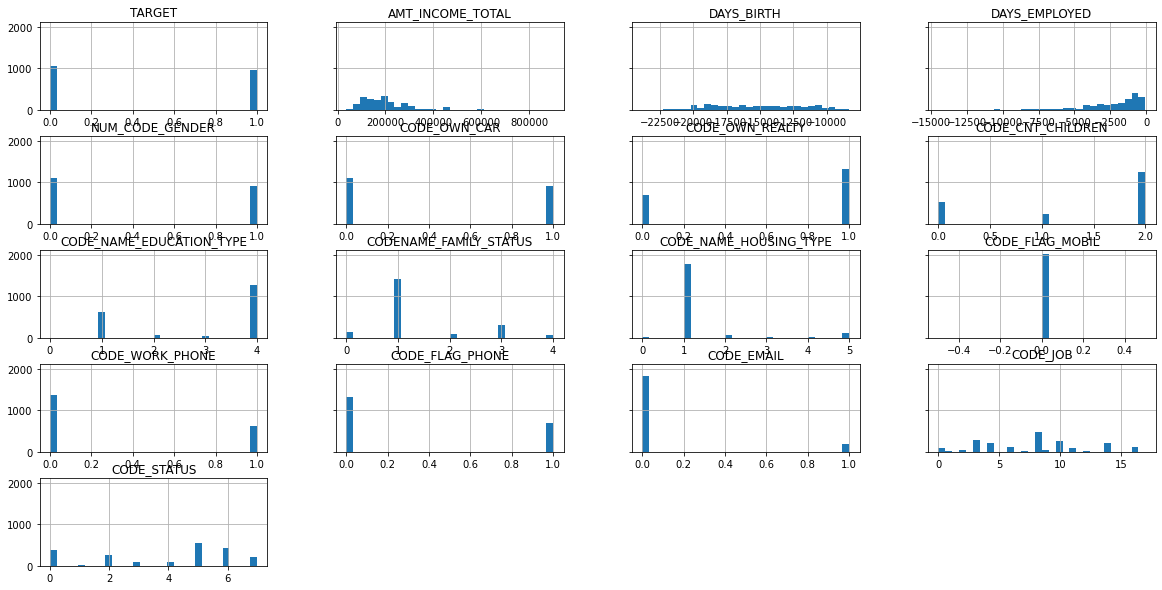

In [81]:
display(df.describe())
hist = df.hist(bins=30, sharey=True, figsize=(20, 10))

In [82]:
predictor = estimator.deploy(initial_instance_count = 1,
                            instance_type = "ml.t2.medium",
                            endpoint_name = "ep-creditcard2")


---------!